In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets as dts
from sklearn.cluster import KMeans


In [13]:
iris = dts.load_iris()

In [16]:
df = pd.DataFrame(iris.data, columns=iris.feature_names) 
df['target']=iris.target

In [18]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [19]:
kmeans = KMeans(n_clusters=4)

In [20]:
point = df[['sepal length (cm)','petal length (cm)']]

In [22]:
kmeans.fit(point)

KMeans(n_clusters=4)

In [23]:
label = kmeans.labels_

In [24]:
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 3, 1, 3, 1, 3, 1, 3, 3, 3, 3, 1, 3, 1,
       3, 3, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 3, 1, 1, 1,
       3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 2, 1, 2, 1, 2, 2, 3, 2, 2, 2,
       1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1])

In [28]:
dataset_kmeans = pd.DataFrame({'label' : label, 'species' : df.target})

In [29]:
ctb = pd.crosstab(dataset_kmeans['label'], dataset_kmeans['species'])

In [39]:
ctb

species,0,1,2
label,,,
0,50,0,0
1,0,23,27
2,0,0,22
3,0,27,1


In [31]:
x = point['sepal length (cm)']
y = point['petal length (cm)']

In [32]:
centroid = kmeans.cluster_centers_

In [33]:
centroid

array([[5.006     , 1.462     ],
       [6.292     , 4.94      ],
       [7.12272727, 6.03181818],
       [5.53214286, 3.96071429]])

In [34]:
centroid_x = centroid[:,0]
centroid_y = centroid[:,1]

In [40]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


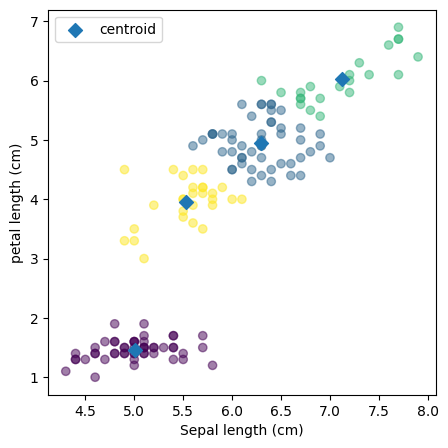

In [47]:
plt.figure(figsize=(5,5))
plt.scatter(x,y, alpha=0.5, c=label)
plt.scatter(centroid_x, centroid_y, marker='D', s=50, label='centroid')
plt.xlabel('Sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.legend()
plt.show()

### ELBOW

In [48]:
cluster_range = range(1,6)
inertias = []

for k in cluster_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(point)
    inertias.append(kmeans.inertia_)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


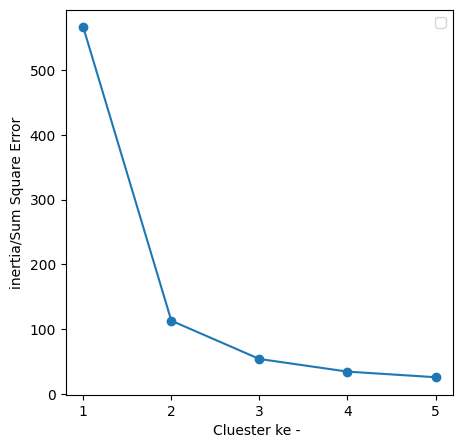

In [49]:
plt.figure(figsize=(5,5))
plt.plot(cluster_range, inertias, '-o')
plt.xlabel('Cluester ke - ')
plt.ylabel('inertia/Sum Square Error')
plt.xticks(cluster_range)
plt.legend()
plt.show()